[[ 0.71914429  0.94902044  0.82445013  0.22350812  0.35574958  0.5541106
   0.81525204  0.30924394  0.17920346  0.10448906]
 [ 0.80218422  0.60187458  0.00895282  0.51534695  0.29701128  0.92411375
   0.001657    0.64159632  0.03158822  0.85640066]
 [ 0.67515874  0.14127519  0.96350527  0.86276119  0.4237085   0.41044828
   0.14033586  0.09234581  0.6524119   0.52782004]
 [ 0.09147296  0.35477712  0.37233583  0.48197257  0.54991115  0.28702947
   0.7792069   0.43949934  0.11627673  0.54503358]
 [ 0.08853887  0.99878544  0.42022526  0.9075292   0.50994394  0.10938874
   0.67600786  0.13080726  0.5963369   0.66958918]
 [ 0.18247275  0.7049052   0.79147997  0.52653669  0.37867036  0.74484985
   0.92420431  0.67604036  0.21258321  0.35930522]
 [ 0.9114914   0.54898909  0.37468528  0.35321981  0.36193651  0.08882793
   0.94636659  0.89621529  0.29958013  0.32335965]
 [ 0.08286757  0.22820586  0.55943435  0.77139161  0.91954927  0.79727777
   0.18059055  0.66624557  0.68178861  0.1400716 ]
 

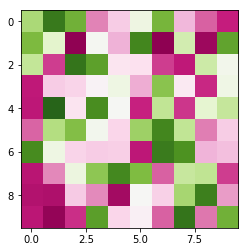

[[ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]]


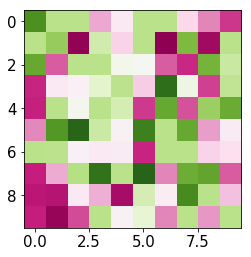

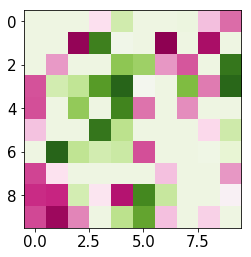

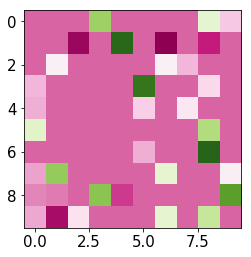

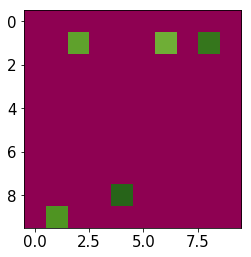

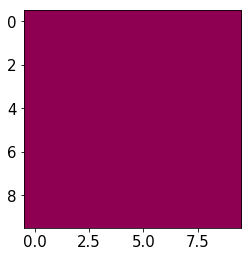

In [23]:
import numpy as np
import matplotlib.pyplot as pl

import pandas as pd

%matplotlib inline


#Defining a carpark Physcial layout is 10 x 10 matrix of 100 cares

cp =np.zeros(shape=(10,10))
soccp =np.random.rand(10,10)
print(soccp)
fig, ax = pl.subplots()
ax.imshow(soccp, cmap=pl.cm.PiYG,interpolation='nearest')

numrows, numcols = soccp.shape

def setnocar(e):
    if e >= 50: 
        print("50 % car park is empyt")
    else:
        print("Car park has %f epmpty places")


def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)
pl.rc('font',size=15)
ax.format_coord = format_coord

pl.show()

def soccharg(soc0,p):
    c1=soc0
    pc=p
    if c1 <0.8:
        c2 = c1 + p*0.04
    elif c1 >=0.8:
        c2 = 0.8
    else:
        c2 = c1
    return c2

cp=soccp
for t in range(5):
    for cc in range(numcols):
        for rr in range(numrows):
            cp[rr][cc] = soccharg(cp[rr][cc],6.2)
    fig =pl.figure(t)
    fig, ax = pl.subplots()
    pl.rc('font',size=15)
    ax.imshow(cp, cmap=pl.cm.PiYG,interpolation='nearest')
    ax.format_coord = format_coord

        
        
#fig, ax = pl.subplots()
#pl.rc('font',size=15)
#ax.imshow(cp, interpolation='nearest')
#ax.format_coord = format_coord
print(cp)


In [24]:
from cvxopt import matrix, solvers
c = matrix([-4., -5.])
G = matrix([[2., 2., -1., 0.], [1., 5., 0., -1.]])
h = matrix([3., 3., 0., 0.])
sol = solvers.lp(c, G, h)
print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0: -5.2727e+00 -1.4182e+01  1e+01  5e-01  1e+00  1e+00
 1: -5.9439e+00 -6.8717e+00  5e-01  7e-02  2e-01  4e-01
 2: -5.9991e+00 -6.0109e+00  6e-03  8e-04  2e-03  4e-03
 3: -6.0000e+00 -6.0001e+00  6e-05  8e-06  2e-05  4e-05
 4: -6.0000e+00 -6.0000e+00  6e-07  8e-08  2e-07  4e-07
 5: -6.0000e+00 -6.0000e+00  6e-09  8e-10  2e-09  4e-09
Optimal solution found.
[ 1.50e+00]
[-6.78e-11]

